<a href="https://colab.research.google.com/github/farghea/Pose-Detection-Biomechanics/blob/main/Dummy_neck_acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yt-dlp
!apt-get install -y ffmpeg

import subprocess

def download_video(url, output_filename='myVideo.mp4'):
    temp_video = "temp_video.mp4"
    temp_audio = "temp_audio.m4a"

    command_video = f'yt-dlp -f "bestvideo[ext=mp4]" -o "{temp_video}" {url}'
    command_audio = f'yt-dlp -f "bestaudio[ext=m4a]" -o "{temp_audio}" {url}'
    command_merge = f'ffmpeg -i "{temp_video}" -i "{temp_audio}" -c copy "{output_filename}"'

    process_video = subprocess.Popen(command_video, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_video, stderr_video = process_video.communicate()
    if process_video.returncode != 0:
        print("Error downloading video:")
        print(stderr_video.decode("utf-8"))
        return

    process_audio = subprocess.Popen(command_audio, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_audio, stderr_audio = process_audio.communicate()
    if process_audio.returncode != 0:
        print("Error downloading audio:")
        print(stderr_audio.decode("utf-8"))
        return

    process_merge = subprocess.Popen(command_merge, shell=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    stdout_merge, stderr_merge = process_merge.communicate()
    if process_merge.returncode != 0:
        print("Error merging audio and video:")
        print(stderr_merge.decode("utf-8"))
    else:
        print(f"Video downloaded successfully as {output_filename}")

# YouTube video URL
video_url = 'https://www.youtube.com/watch?v=EkeFAZf7J9E'

download_video(video_url, 'myVideo.mp4')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 100.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 93.8 MB/s eta 0:00:00
Reading package lists... Done
Building dependency tree       
Reading state information... Done
ffmpeg is already the newest version (7:4.2.7-0ubuntu0.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
Video downloaded successfully as myVideo.mp4


In [ ]:
!pip install moviepy
!pip install imageio-ffmpeg


In [ ]:
from moviepy.video.io.VideoFileClip import VideoFileClip

# Define start and end times in seconds
start_time = 60 + 33
end_time = 60 + 36.8

# Load the video
video = VideoFileClip("myVideo.mp4")

# Cut the video
clip = video.subclip(start_time, end_time)

# Save the video
clip.write_videofile("myclip.mp4")


Moviepy - Building video myclip.mp4.
MoviePy - Writing audio in myclipTEMP_MPY_wvf_snd.mp3


MoviePy - Done.
Moviepy - Writing video myclip.mp4



Moviepy - Done !
Moviepy - video ready myclip.mp4


In [ ]:
from IPython.display import HTML
from base64 import b64encode

video_path = 'myclip.mp4'
video_file = open(video_path, 'rb')
video_bytes = video_file.read()
video_url = 'data:video/mp4;base64,' + b64encode(video_bytes).decode()
HTML(f'<video width=400 controls><source src="{video_url}" type="video/mp4"></video>')

In [ ]:
!rm -r frames
!mkdir frames

!rm -r head_track
!mkdir head_track


rm: cannot remove 'frames': No such file or directory
rm: cannot remove 'head_track': No such file or directory


In [ ]:
!pip install gdown


In [ ]:
import gdown

url = 'https://drive.google.com/uc?id=1qElQrQZurgfiFYGwOGk5Q0e284FcJTzd'
output = 'centroid_sign.png'  # Change this to the desired file name and extension
gdown.download(url, output, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1qElQrQZurgfiFYGwOGk5Q0e284FcJTzd
To: /content/centroid_sign.png
100%|██████████| 11.9k/11.9k [00:00<00:00, 12.8MB/s]


'centroid_sign.png'

In [ ]:
import cv2
import os

# Open the video file
vidcap = cv2.VideoCapture('myclip.mp4')

# Read the first frame
success,image = vidcap.read()
frame_count = 0

# Loop through all frames in the video
while success:
    # Save the current frame as a JPG image
    cv2.imwrite("frames/frame%d.jpg" % frame_count, image)

    # Read the next frame
    success,image = vidcap.read()
    frame_count += 1


In [ ]:
!pip install opencv-python-headless


In [1]:
import os
import numpy as np

def find_and_show_matches(image_path, template_path, output_path, threshold=0.8):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    template = cv2.imread(template_path, cv2.IMREAD_COLOR)

    if image is None or template is None:
        print("Could not read one of the input images.")
        return

    result = cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)
    locations = np.where(result >= threshold)

    w, h, _ = template.shape
    coordinates = []
    for pt in zip(*locations[::-1]):
        cv2.rectangle(image, pt, (pt[0] + w, pt[1] + h), (0, 255, 0), 2)
        centroid = (pt[0] + w // 2, pt[1] + h // 2)
        coordinates.append(centroid)

        # Draw a '*' symbol at the centroid
        cv2.putText(image, '*', centroid, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

    # Save the image with the matched areas highlighted and centroids marked
    os.makedirs(os.path.dirname(output_path), exist_ok=True)
    cv2.imwrite(output_path, image)

    return centroid

mytime = np.array(range(frame_count))
all_centroids = None
for i in range(frame_count):
  # Replace these with the paths to your images
  frame_x_path = "/content/frames/frame%d.jpg" %i
  centroid_sign_path = "centroid_sign.png"
  output_path = "/content/head_track/matched_image_%d.png" %i

  centroid = find_and_show_matches(frame_x_path, centroid_sign_path, output_path)
  centroid = np.array(centroid)
  if all_centroids is None:
    all_centroids = centroid
  else:
    all_centroids = np.vstack((all_centroids, centroid))
  print("Centroids of matched areas:", centroid)


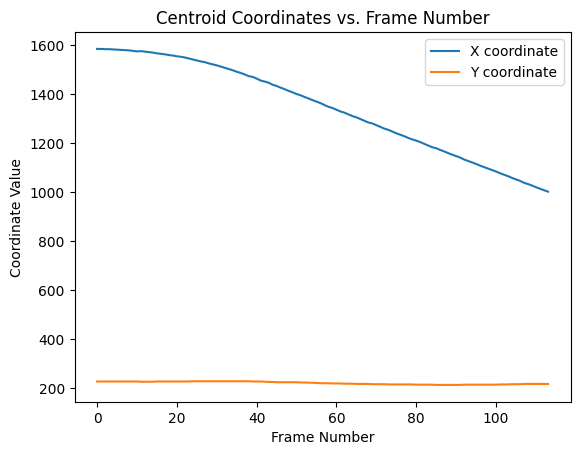

In [ ]:
import matplotlib.pyplot as plt

mytime = np.array(range(frame_count))

# Plotting centroids
plt.plot(mytime, all_centroids[:, 0], label='X coordinate')
plt.plot(mytime, all_centroids[:, 1], label='Y coordinate')

# Adding labels and title
plt.xlabel('Frame Number')
plt.ylabel('Coordinate Value')
plt.title('Centroid Coordinates vs. Frame Number')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
dt = mytime[1] - mytime[0]
acceleration = np.zeros_like(all_centroids)

for i in range(1, len(all_centroids)):
    p1 = all_centroids[i-1]
    p2 = all_centroids[i]
    v1 = (p2 - p1) / dt
    acceleration[i] = (2*(p2 - p1) - v1*dt) / dt**2



Text(0, 0.5, 'acceleration (au)')

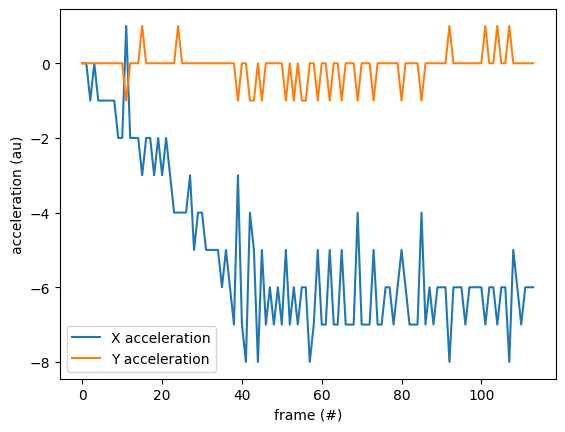

In [ ]:
# Plotting accelerations
plt.plot(mytime, acceleration[:, 0], label='X acceleration')
plt.plot(mytime, acceleration[:, 1], label='Y acceleration')

plt.legend()
plt.xlabel('frame (#)')
plt.ylabel('acceleration (au)')


In [ ]:
import cv2
import os

# Set up the input and output paths
input_path = '/content/head_track/matched_image_%d.png'
output_path = 'detected_centroid.mp4'

# Get the dimensions of the first image
image = cv2.imread(input_path % 0)
height, width, layers = image.shape

# Create the video writer object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video = cv2.VideoWriter(output_path, fourcc, 30, (width, height))

# Loop over the images and add them to the video
for i in range(frame_count):
    # Read in the image
    image_path = input_path % i
    image = cv2.imread(image_path)

    # Check that the image was read correctly
    if image is None:
        print('Could not read image:', image_path)
        continue

    # Add the image to the video
    video.write(image)

# Release the video writer and close all windows
cv2.destroyAllWindows()
video.release()


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

model = hub.load('https://bit.ly/metrabs_l')  # Takes about 3 minutes


In [2]:
all_predictions = []
all_images = []
for i in range(frame_count):
  file_path = os.path.join('frames', 'frame%d.jpg' %i)
  print(file_path)
  img = tf.image.decode_image(tf.io.read_file(file_path))
  all_images.append(img)
  pred = model.detect_poses(img, skeleton='smpl+head_30')
  all_predictions.append(pred)


In [ ]:
def plot_results(image, pred, joint_names, joint_edges):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib.patches import Rectangle

    # Set font size
    plt.rcParams['font.size'] = 9

    # Set plot size
    fig = plt.figure(figsize=(18/2.54, 10/2.54))

    image_ax = fig.add_subplot(1, 2, 1)
    image_ax.imshow(image.numpy())
    for x, y, w, h, c in pred['boxes'].numpy():
        image_ax.add_patch(Rectangle((x, y), w, h, fill=False))

    image_ax.set_xticks([])
    image_ax.set_yticks([])

    pose_ax = fig.add_subplot(1, 2, 2, projection='3d')
    pose_ax.view_init(5, -75)
    pose_ax.set_xlim3d(-1500+500, 1500-500)
    pose_ax.set_zlim3d(-1500+500, 1500-500)
    pose_ax.set_ylim3d(2000-500, 5000-500)

    pose_ax.set_xticks([])
    pose_ax.set_yticks([])

    poses3d = pred['poses3d'].numpy()
    poses3d[..., 1], poses3d[..., 2] = poses3d[..., 2], -poses3d[..., 1]
    for pose3d, pose2d in zip(poses3d, pred['poses2d'].numpy()):
        for i_start, i_end in joint_edges:
            image_ax.plot(*zip(pose2d[i_start], pose2d[i_end]), marker='o', markersize=2)
            pose_ax.plot(*zip(pose3d[i_start], pose3d[i_end]), marker='o', markersize=2)
        image_ax.scatter(*pose2d.T, s=2)
        pose_ax.scatter(*pose3d.T, s=2)

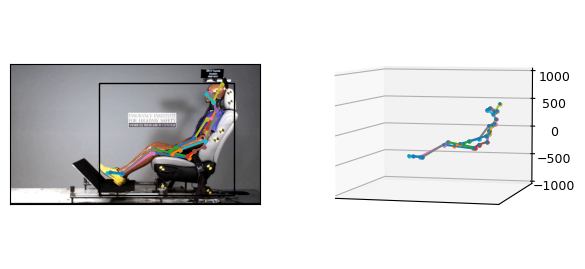

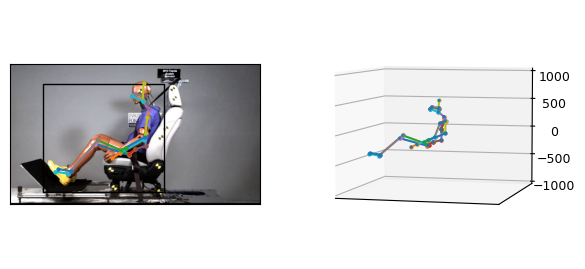

In [ ]:
joint_names = model.per_skeleton_joint_names['smpl+head_30'].numpy().astype(str)
joint_edges = model.per_skeleton_joint_edges['smpl+head_30'].numpy()

for i in [0, -1]:
  img = all_images[i]
  pred = all_predictions[i]
  plot_results(img, pred, joint_names, joint_edges)
  plt.savefig('plot_accelaration_'+str(i)+'.svg', dpi=1000, format='svg')



In [ ]:
!rm -r head_track_pose_detection
!mkdir head_track_pose_detection

rm: cannot remove 'head_track_pose_detection': No such file or directory


In [3]:
pred_coordinates = None  # Initialize pred_coordinates as None

for i in range(frame_count):
    img = all_images[i]
    pred = all_predictions[i]

    poses2d = pred['poses2d'].numpy()

    fig = plt.figure(figsize=(10, 10))
    image_ax = fig.add_subplot(1, 1, 1)
    image_ax.imshow(img.numpy())

    indx0 = 29
    pnt0 = poses2d[0, indx0, :]

    indx1 = 28
    pnt1 = poses2d[0, indx1, :]

    portion = 0.7
    estimated_center = portion*pnt1 + (1 - portion)*pnt0
    image_ax.plot(estimated_center[0], estimated_center[1], 'ob')

    if pred_coordinates is None:
        pred_coordinates = np.array([estimated_center])  # Initialize pred_coordinates with the first estimated center
    else:
        pred_coordinates = np.vstack((pred_coordinates, estimated_center))

    fig.savefig('/content/head_track_pose_detection/head_detect_%d' % i, dpi=300)
    plt.show()


In [ ]:
dt = mytime[1] - mytime[0]
acceleration_pose_detection = np.zeros_like(pred_coordinates)

for i in range(1, len(pred_coordinates)):
    p1 = pred_coordinates[i-1]
    p2 = pred_coordinates[i]
    v1 = (p2 - p1) / dt
    acceleration_pose_detection[i] = (2*(p2 - p1) - v1*dt) / dt**2


In [ ]:
from scipy.signal import butter, lfilter

# low pass filter function
def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


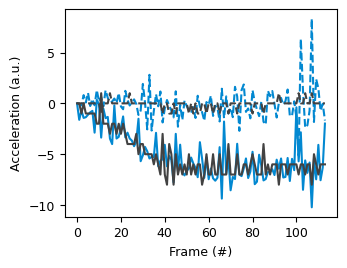

In [ ]:
# Plotting accelerations
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size'] = 9

# Set plot size
fig, ax = plt.subplots(figsize=(9/2.54, 7/2.54))  # Convert cm to inches

plt.plot(mytime, acceleration_pose_detection[:, 0], '-', color = "#0288D1")
plt.plot(mytime, acceleration_pose_detection[:, 1], '--', color = "#0288D1")

plt.plot(mytime, acceleration[:, 0], '-', color = '#424242')
plt.plot(mytime, acceleration[:, 1], '--', color = '#424242')


# plt.legend()
plt.xlabel('Frame (#)')
plt.ylabel('Acceleration (a.u.)')
plt.tight_layout()

plt.savefig('plot_accelaration.svg', dpi=600, format='svg')


In [ ]:
# Plotting accelerations
import matplotlib.pyplot as plt

# Set font size
plt.rcParams['font.size'] = 9

# Set plot size
fig, ax = plt.subplots(figsize=(9/2.54, 7/2.54))  # Convert cm to inches

cutoff = 2
fs = 1

plt.plot(mytime, butter_lowpass_filter(acceleration_pose_detection[:, 0], cutoff, fs, order=6), '-', color = "#0288D1")
plt.plot(mytime, butter_lowpass_filter(acceleration_pose_detection[:, 1], cutoff, fs, order=6), '--', color = "#0288D1")

plt.plot(mytime, butter_lowpass_filter(acceleration[:, 0], cutoff, fs, order=6), '-', color = '#424242')
plt.plot(mytime, butter_lowpass_filter(acceleration[:, 1], cutoff, fs, order=6), '--', color = '#424242')


# plt.legend()
plt.xlabel('Frame (#)')
plt.ylabel('Acceleration (a.u.)')
plt.tight_layout()

plt.savefig('plot_accelaration_filtered.svg', dpi=600, format='svg')
